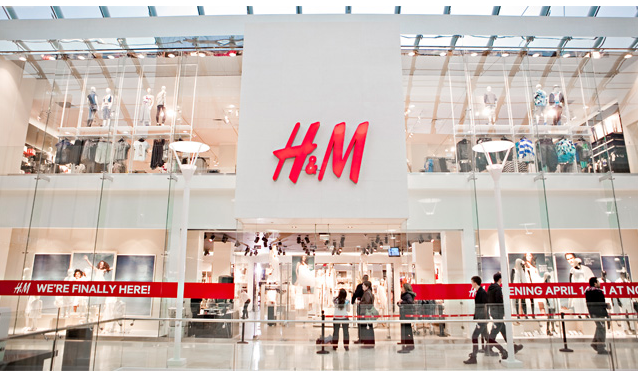

In [1]:
#Load all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import datetime as dt
import matplotlib.image as mpimg

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">EDA on Datasets</p>

In [2]:
#Load all the datasets
articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [3]:
# Let's find out the shapes of all three dataframes
shape=pd.DataFrame({"Total Rows":[articles.shape[0],customers.shape[0],transactions.shape[0]],
                    "Total Columns":[articles.shape[1],customers.shape[1],transactions.shape[1]]},index=['articles','customers','transactions'])
shape

,Total Rows,Total Columns
articles,105542,25
customers,1371980,7
transactions,31788324,5


In [4]:
n = len(pd.unique(transactions['customer_id'])) 
m = len(pd.unique(customers['customer_id'])) 
length=len(set(transactions.customer_id.values.tolist()))/customers.shape[0]
npur=100-(length*100)
print("Tổng số khách hàng:",m)
print("Số lượng khách hàng thực hiện ít nhất một giao dịch:",n)
print("% khách hàng đã thực hiện ít nhất một giao dịch : ",length*100)
print("Số lượng khách hàng không mua hàng : ",(customers.shape[0] - len(set(transactions.customer_id.values.tolist()))))
print("% khách hàng không mua hàng : ",npur)
print("Có vẻ như không phải tất cả khách hàng đều mua hàng, có khoảng 1% không có lịch sử mua hàng.")

Tổng số khách hàng: 1371980
Số lượng khách hàng thực hiện ít nhất một giao dịch: 1362281
% khách hàng đã thực hiện ít nhất một giao dịch :  99.29306549658158
Số lượng khách hàng không mua hàng :  9699
% khách hàng không mua hàng :  0.7069345034184238
Có vẻ như không phải tất cả khách hàng đều mua hàng, có khoảng 1% không có lịch sử mua hàng.


In [5]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [6]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [8]:
#check null values in transaction dataset
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Articles Sold</p>

In [9]:
year=transactions.groupby('t_dat').count()[['article_id']]
yearwise1=year.reset_index()
#yearwise1.head()
print (transactions.t_dat.min())
print (transactions.t_dat.max())

2018-09-20
2020-09-22


In [10]:
yearasecact = yearwise1.sort_values(['article_id'], ascending=False).head(5)
yearasecact

,t_dat,article_id
373,2019-09-28,198622
569,2020-04-11,162799
435,2019-11-29,160875
64,2018-11-23,142018
9,2018-09-29,141700


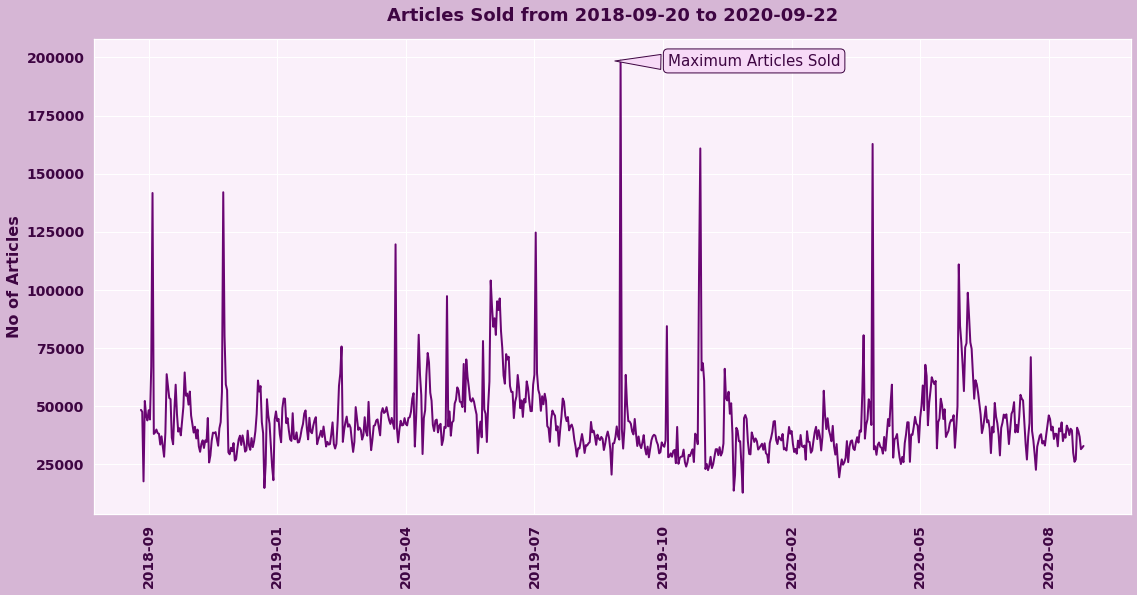

In [11]:
yearwise1['t_dat'] = pd.to_datetime(yearwise1['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'article_id', data=yearwise1, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Articles Sold from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')

x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Articles Sold',
            xy=(x_line_annotation, 198522),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Như thể hiện trong biểu đồ, chúng tôi thấy rằng có những đợt tăng đột biến rõ rệt trong 3 năm. Tối đa 198.622 mặt hàng được bán vào ngày 28-09-2019, phá vỡ mọi kỷ lục trong 3 năm. Trong khi mức tối đa thứ hai là 162.799 mặt hàng được bán vào ngày 2020-04-11 và mức tối đa thứ ba là 160.875 mặt hàng được bán vào ngày 29-11-2019.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Transaction Amount</p>

In [12]:
yearp=transactions.groupby('t_dat').sum()[['price']]
yearwise1p=yearp.reset_index()
#yearwise1p.head()
print (yearwise1p.price.max())

6161.6030677966


In [13]:
yearasec = yearwise1p.sort_values(['price'], ascending=False).head(5)
yearasec

,t_dat,price
373,2019-09-28,6161.603068
435,2019-11-29,4444.342390
9,2018-09-29,4071.381305
569,2020-04-11,3961.987763
64,2018-11-23,3891.939441


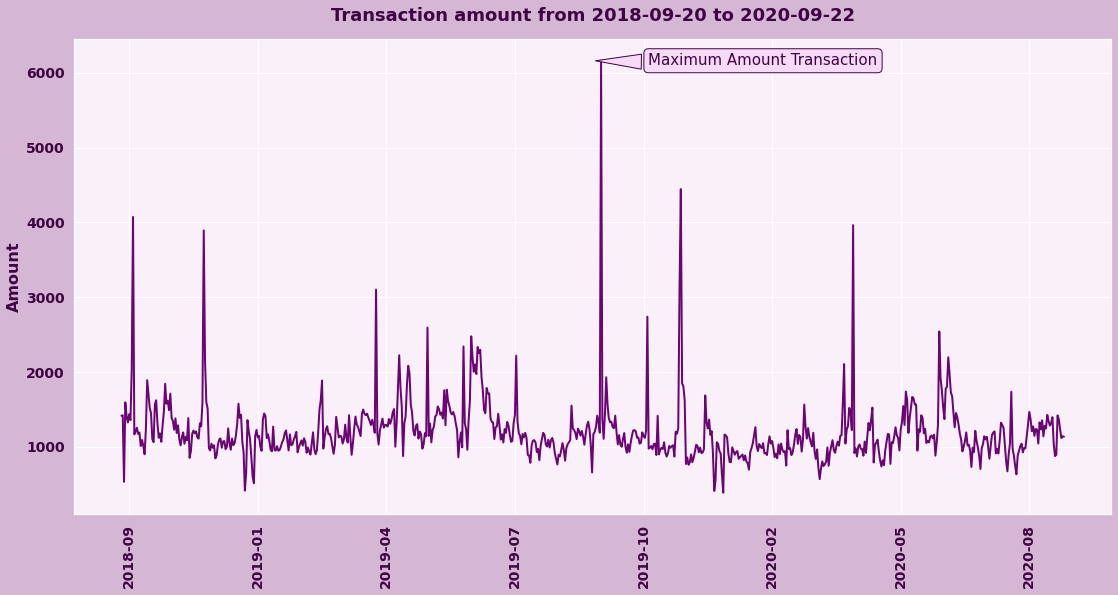

In [14]:
yearwise1p['t_dat'] = pd.to_datetime(yearwise1p['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'price', data=yearwise1p, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Transaction amount from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Amount Transaction',
            xy=(x_line_annotation,6161),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))

ttl.set_position([.5, 1.02])
ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Chúng tôi thấy rằng số tiền giao dịch tối đa vào ngày 28-09-2019 là 6.161. Trong đó, giao dịch tối đa thứ hai là 4.444 vào ngày 29-11-2019, điều này cho thấy số tiền giao dịch giảm 25% trong năm 2019-29-11-29.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Top Ten Customers</p>

In [15]:
check=transactions.groupby('customer_id').count()[['article_id']].sort_values('article_id', ascending=False)
newcheck=check.head(10)
newcheck1=newcheck.reset_index()

In [16]:
fig = go.Figure(data=[go.Table(
    header=dict(values = [['<b>Customer ID</b><br>Top 10'],
                ['<b>Item Count</b>']],
                fill_color='#d6b6d5',
                font_color="#3e0542",
                align='left'),
    cells=dict(values=[newcheck1.customer_id, newcheck1.article_id],
               fill_color='#faf0fa',
               align='left'))
])

fig.show()

As shown in the above table top 10 customers are those which bought article more than 1,000 in the last three years.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Articles Sold by Age Distribution</p>

In [17]:
custfin= pd.DataFrame(customers, columns = ['customer_id','age'])

In [18]:
total_tran = pd.merge(custfin,transactions, how='right', on='customer_id')

In [19]:
total_tran["age"].fillna(value=0,inplace=True)
total_tran["age"]=total_tran["age"].apply(int)

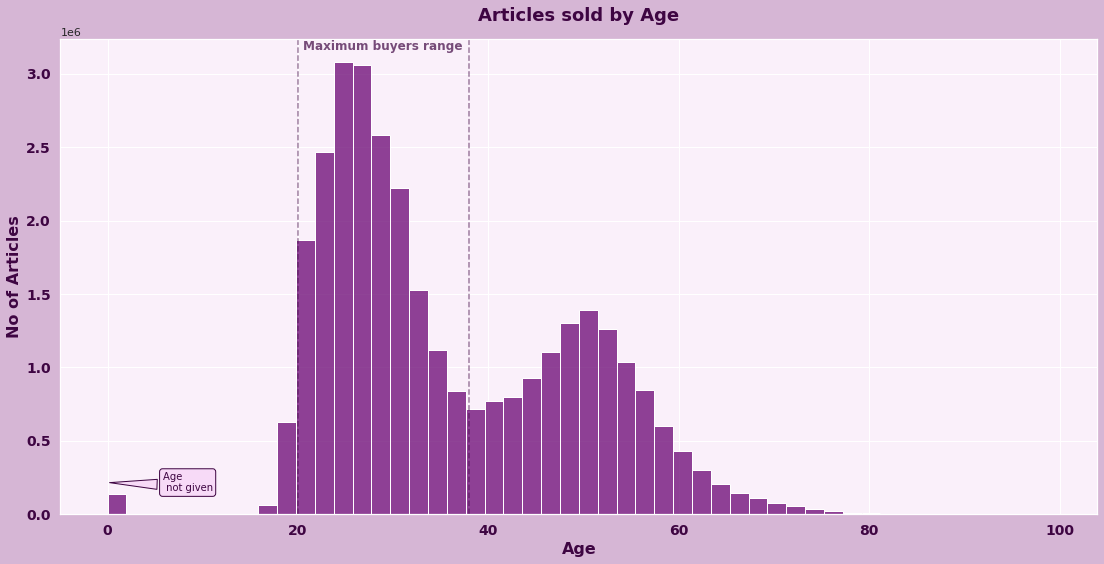

In [20]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)
ax = sns.histplot(data=total_tran, x='age', bins=50,color='#6a0573')

ax.annotate('Age \n not given',
            xy=(0,216100),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=10, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))

ax.axvline(x=20, linestyle='dashed', alpha=0.5,color='#3e0542')
ax.axvline(x=38, linestyle='dashed', alpha=0.5,color='#3e0542')
ax.text(x=20.5, y=3161000, s='Maximum buyers range', alpha=0.7, color='#3e0542',fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Age', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ttl = ax.set_title('Articles sold by Age', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')

# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Phân phối cho thấy phạm vi người mua tối đa là từ 21 đến 39 tuổi. Vài độ tuổi của khách hàng không được đưa ra.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Articles Sold by Sales Channel</p>

In [21]:
datanew= pd.DataFrame(total_tran, columns = ['price','t_dat','sales_channel_id','article_id'])
df = datanew.groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
print (df.article_id.max())
print (df.article_id.min())

168688
4


In [22]:
dfasec = df.sort_values(['article_id'], ascending=True).head(5)
dfasec

,t_dat,sales_channel_id,article_id
1140,2020-05-04,1,4
1137,2020-05-02,1,5
192,2018-12-25,1,43
922,2019-12-25,1,46
1151,2020-05-10,1,90


In [23]:
df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y/%m/%d')

In [24]:
xmin = df["t_dat"].min()
xmax = df["t_dat"].max()

ymin = df["article_id"].min() - 1000
ymax = df["article_id"].max() + 1000

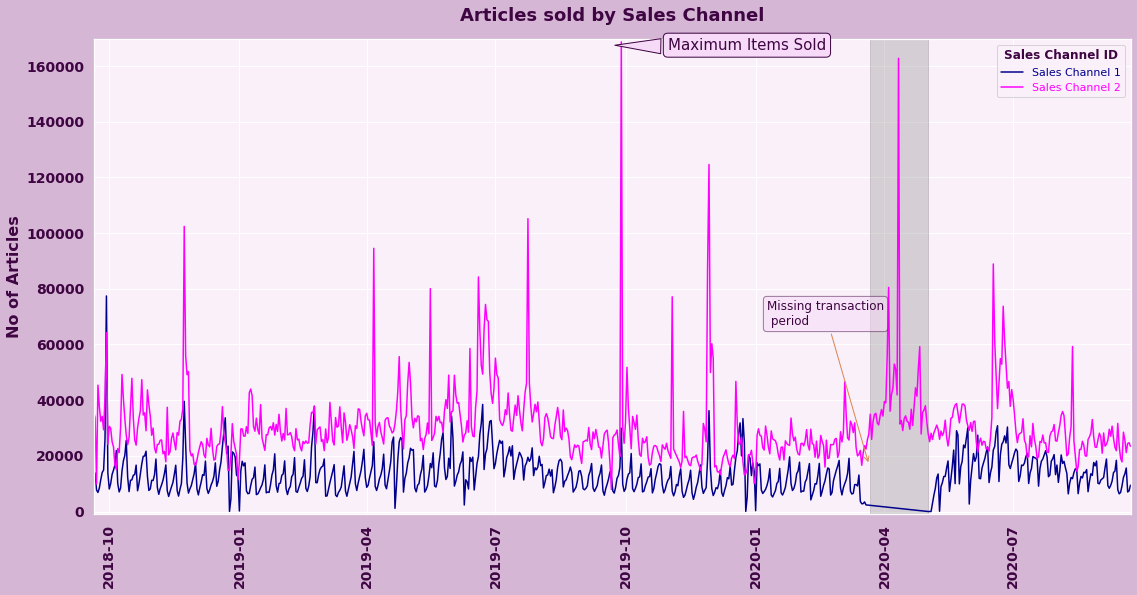

In [25]:
#df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y/%m/%d')
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot(df.loc[df["sales_channel_id"]==1, "t_dat"], df.loc[df["sales_channel_id"]==1, "article_id"], label="Sales Channel 1", color="Darkblue")
ax.plot(df.loc[df["sales_channel_id"]==2, "t_dat"], df.loc[df["sales_channel_id"]==2, "article_id"], label="Sales Channel 2", color="Magenta")
ax.annotate('Maximum Items Sold',
            xy=(x_line_annotation,167500),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

ax.fill_betweenx([ymin,ymax],18343, 18384, color="gray", alpha=0.3)

props = dict(boxstyle='round',facecolor='#f7daf7', edgecolor='#3e0542', alpha=0.5)
ax.annotate("Missing transaction\n period", (18342, 17000), (18270, 67000), \
    arrowprops={"arrowstyle": "->", "color":"C1"},
    color='#3e0542',
    bbox=props,
    fontproperties='italic'
    );


ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')

plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
plt.xticks(rotation=90)
legend=plt.legend(title="Sales Channel ID",labelcolor='linecolor')
plt.setp(legend.get_title(), color='#3e0542',fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.title(f"Articles sold by Sales Channel",fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Có hai kênh bán hàng 1 và 2. Kênh bán hàng 2 có doanh số cao nhất so với kênh bán hàng 1. Kênh bán hàng 1 cũng thiếu giao dịch trong vài tháng.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Transaction Amount by Sales Channel</p>

In [26]:
dfp = datanew.groupby(["t_dat", "sales_channel_id"])["price"].sum().reset_index()
print (dfp.price.max())

5365.663576271178


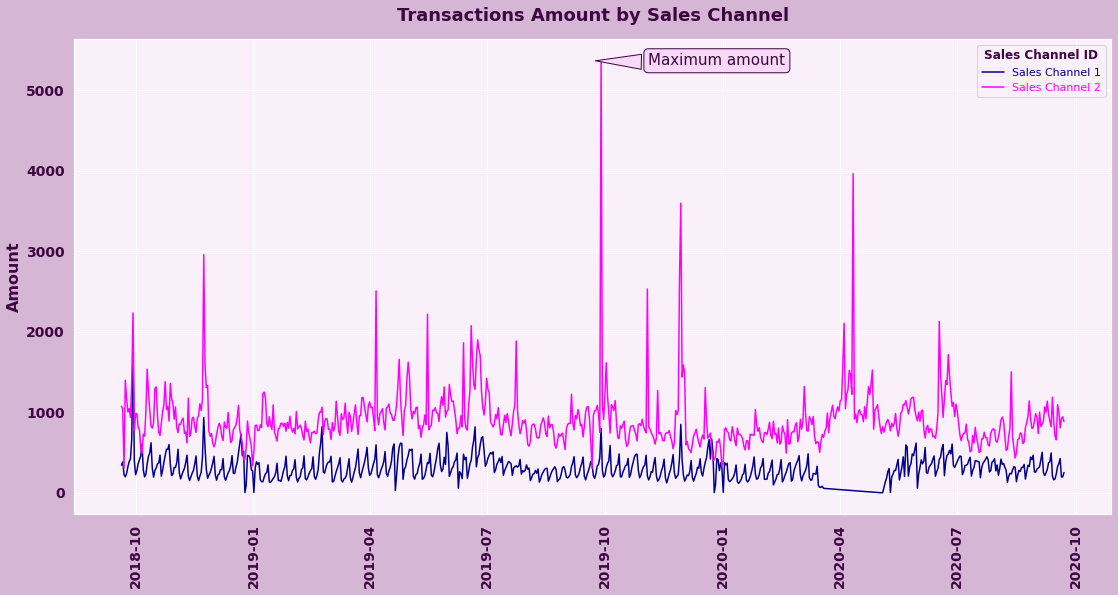

In [27]:
dfp['t_dat'] = pd.to_datetime(dfp['t_dat'], format='%Y/%m/%d')
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot(dfp.loc[dfp["sales_channel_id"]==1, "t_dat"], dfp.loc[dfp["sales_channel_id"]==1, "price"], label="Sales Channel 1", color="Darkblue")
ax.plot(dfp.loc[dfp["sales_channel_id"]==2, "t_dat"], dfp.loc[dfp["sales_channel_id"]==2, "price"], label="Sales Channel 2", color="Magenta")
ax.annotate('Maximum amount',
            xy=(x_line_annotation,5365),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')

plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
plt.xticks(rotation=90)
legend=plt.legend(title="Sales Channel ID",labelcolor='linecolor')
plt.setp(legend.get_title(), color='#3e0542',fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.title(f"Transactions Amount by Sales Channel",fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Kênh bán hàng 2 có lượng giao dịch cao nhất trong 3 năm. Số tiền giao dịch tối đa vào ngày 28-09-2019 cũng bị ảnh hưởng bởi kênh bán hàng 2. Số tiền giao dịch bị thiếu đối với kênh bán hàng 1 trong một vài tháng.c

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Articles sold by Product Group</p>

In [28]:
datanew1= pd.DataFrame(transactions, columns = ['article_id','price'])
artdept=pd.DataFrame(articles, columns = ['article_id','colour_group_name','department_name','index_group_name','product_group_name'])

In [29]:
department = pd.merge(artdept,datanew1, how='right', on='article_id')

In [30]:
departmentc=department.groupby(['product_group_name','index_group_name'])['article_id'].count().reset_index()
departmentc1 = departmentc.sort_values(['article_id'], ascending=False)

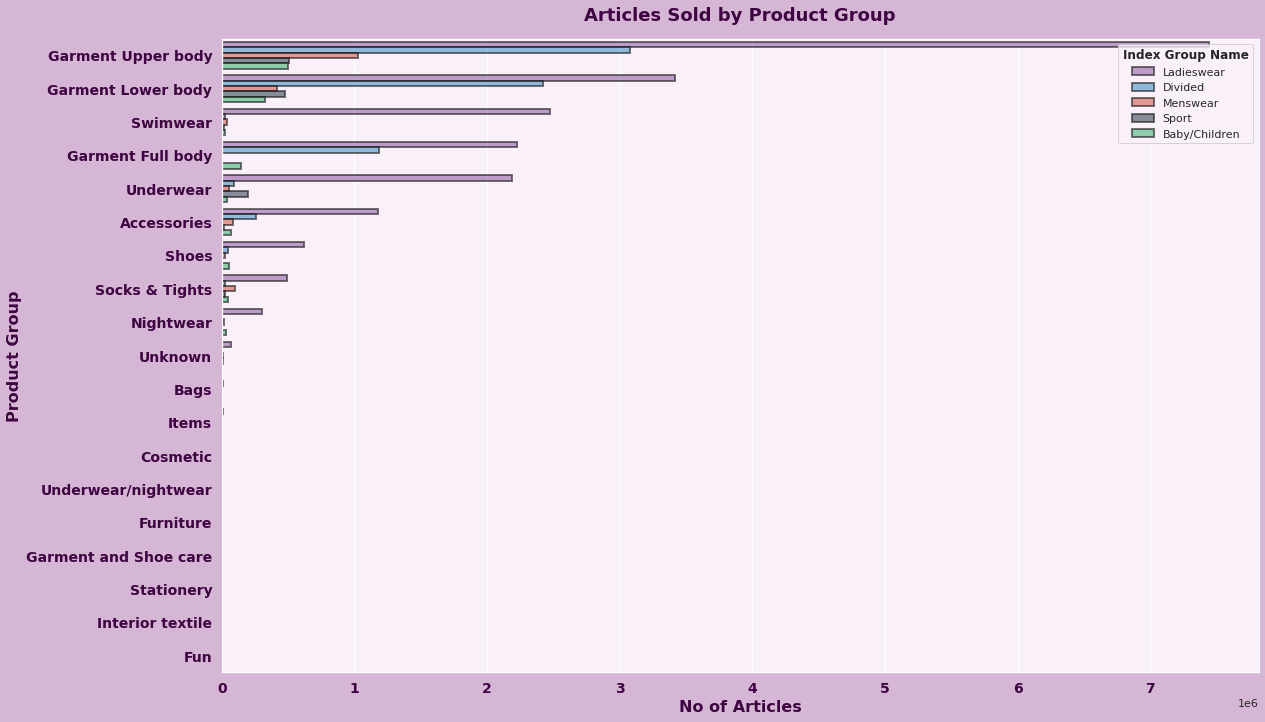

In [31]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]

sns.barplot(data=departmentc1,y="product_group_name", x="article_id",hue="index_group_name",palette=flatui,alpha = 0.6, edgecolor = 'k', linewidth = 2)

plt.tight_layout()


ttl = ax.set_title('Articles Sold by Product Group', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')


ttl.set_position([.5, 1.02])
ax.set_ylabel('Product Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
legend=plt.legend(title="Index Group Name")
plt.setp(legend.get_title(),fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

As shown in the chart Ladieswear index group are more dominant for top 5 product group.However the second index group is divided.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Articles Sold by Department</p>

In [32]:
departmentp=department.groupby(['department_name'])['article_id'].count().reset_index()
departmentp1 = departmentp.sort_values(['article_id'], ascending=False).head(50)

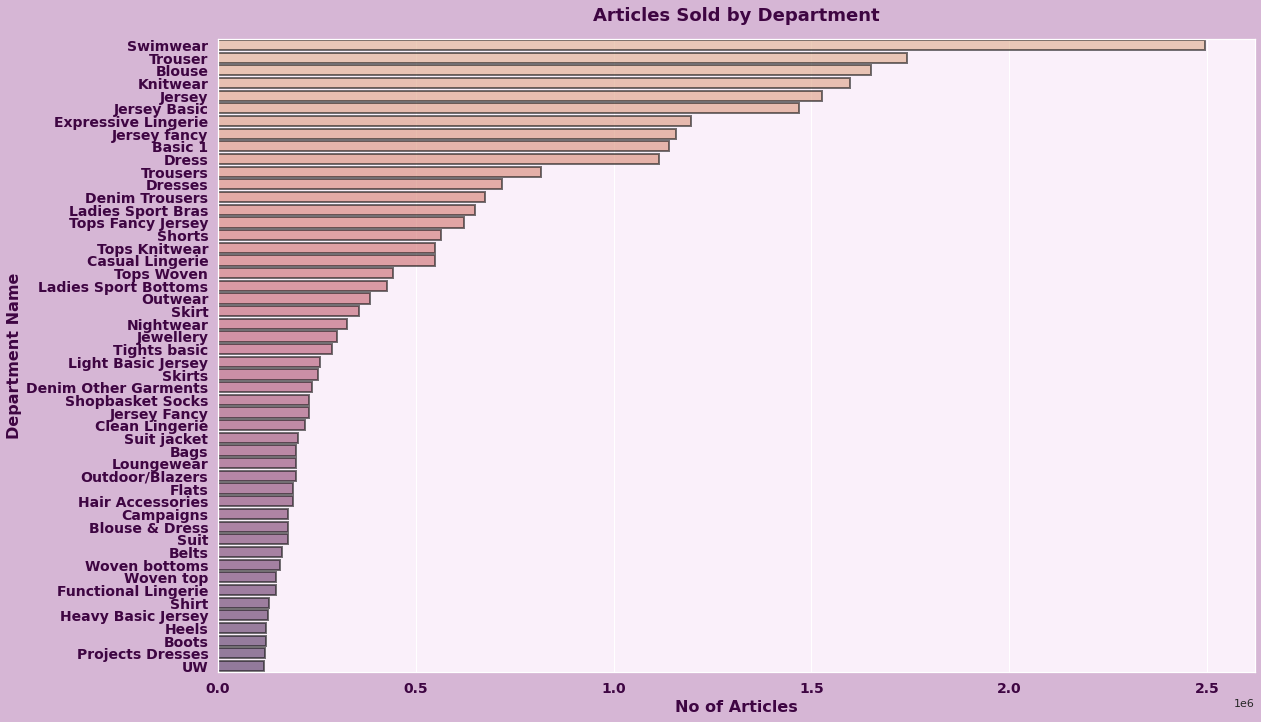

In [33]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
sns.barplot(data=departmentp1,y="department_name", x="article_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Department', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Department Name', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

As shown in chart the articles swimwear,trouser and blouse are the most dominant.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Articles Sold by Colour</p>

In [34]:
art1=pd.DataFrame(articles, columns = ['article_id','colour_group_name','garment_group_name','section_name','product_type_name'])


In [35]:
dep1 = pd.merge(art1,datanew1, how='right', on='article_id')

In [36]:
dep2=dep1.groupby(['colour_group_name'])['article_id'].count().reset_index()
depa = dep2.sort_values(['article_id'], ascending=False)

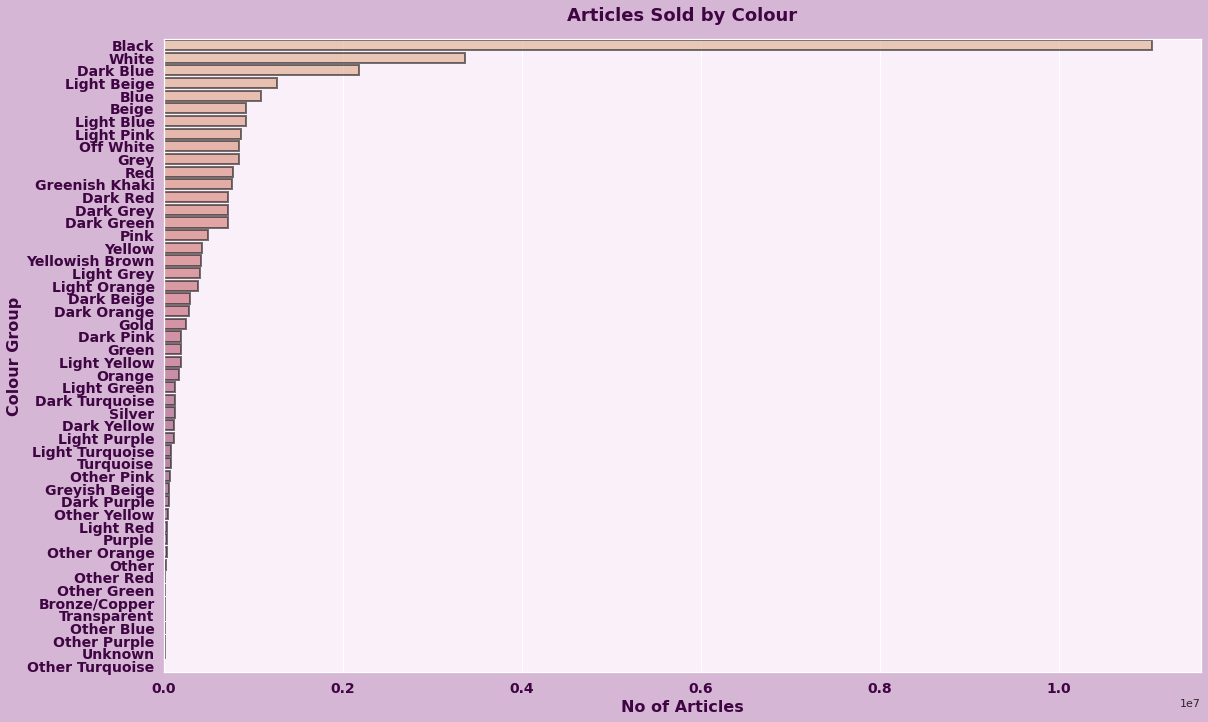

In [37]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
sns.barplot(data=depa,y="colour_group_name", x="article_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Colour', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Colour Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Black color garments are highly demanded by the customers.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Articles Sold by Garment</p>

In [38]:
dep3=dep1.groupby(['garment_group_name'])['article_id'].count().reset_index()
depa1 = dep3.sort_values(['article_id'], ascending=False)

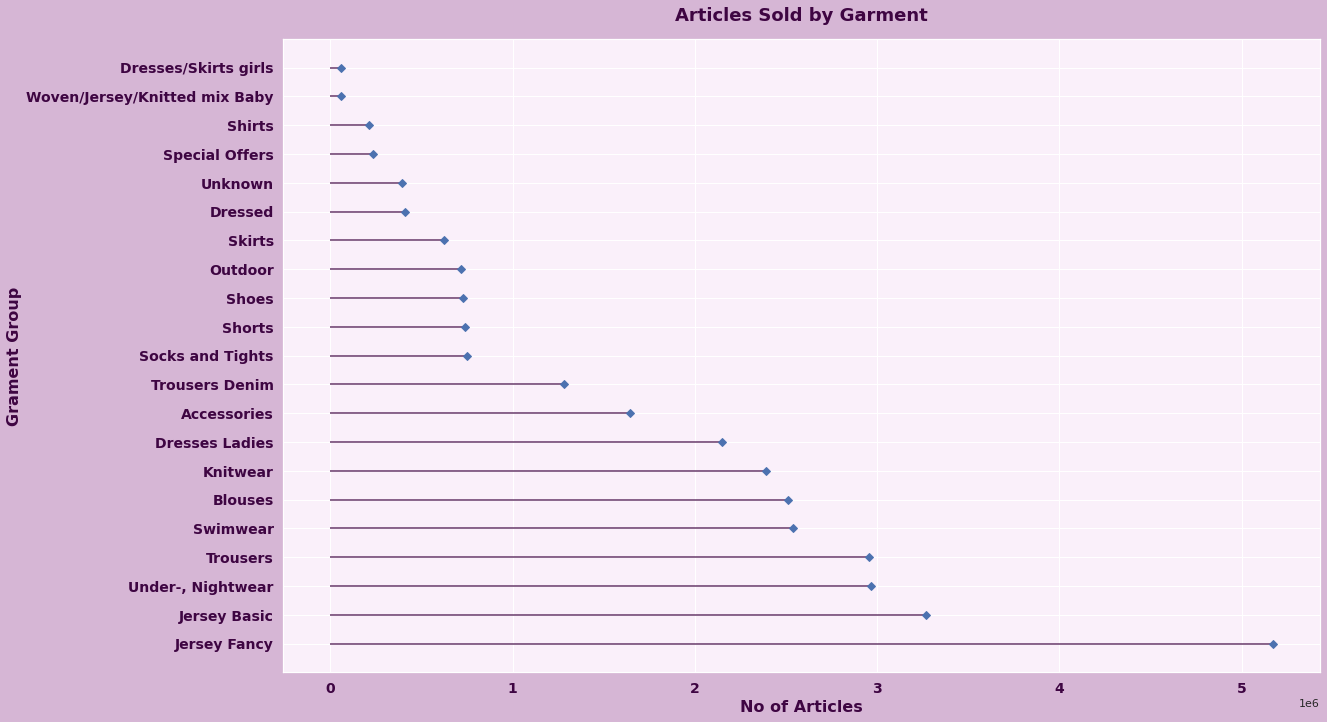

In [39]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
plt.hlines(data=depa1,y="garment_group_name",xmin=0,xmax="article_id",alpha = 0.6, edgecolor = 'k', linewidth = 2,color='#3e0542')
plt.plot(depa1['article_id'], depa1['garment_group_name'], "D")
 
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Garment', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Grament Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Jersey fancy and basic are the most frequent garment for customers.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Fashion News Frequency</p>

In [40]:
cus=pd.DataFrame(customers, columns = ['club_member_status','fashion_news_frequency','customer_id'])
trans= pd.DataFrame(transactions, columns = ['customer_id'])

In [41]:
custran = pd.merge(cus,trans, how='right', on='customer_id')

In [42]:
ct1=custran.groupby(['fashion_news_frequency'])['customer_id'].count().reset_index()
ct2 = ct1.sort_values(['customer_id'], ascending=False)
#ct2.head()

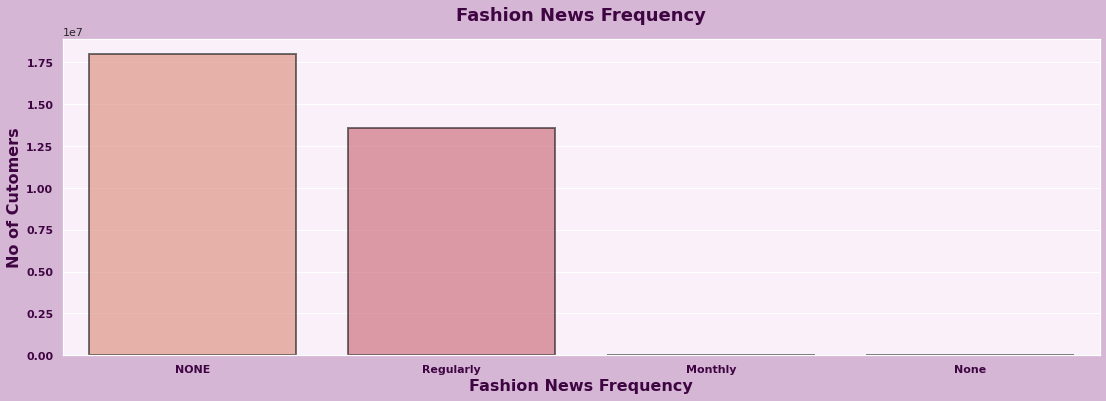

In [43]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,8)
sns.barplot(data=ct2,x="fashion_news_frequency", y="customer_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Fashion News Frequency', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Fashion News Frequency', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

We see that most of the customers do not recieve ang regular update about fashion news.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Club Member Status</p>

In [44]:
cms1=custran.groupby(['club_member_status'])['customer_id'].count().reset_index()
cms2 = cms1.sort_values(['customer_id'], ascending=False)
#cms2.head()

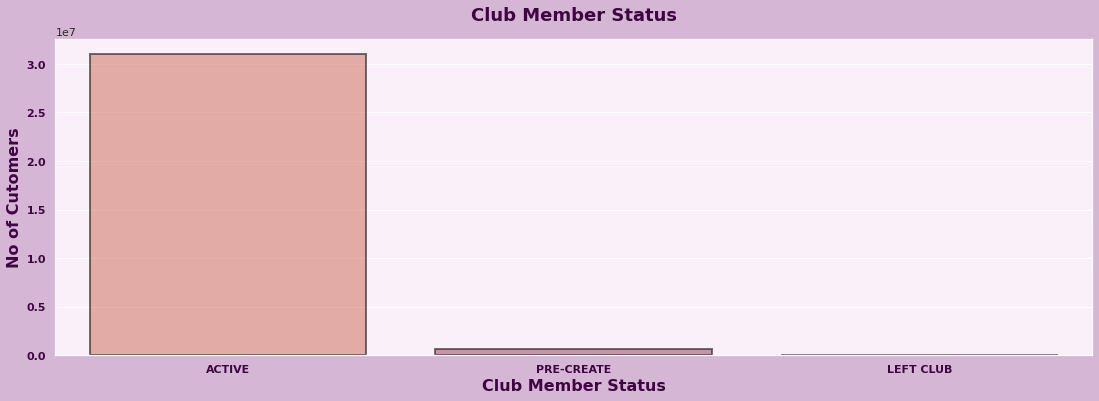

In [45]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,8)
sns.barplot(data=cms2,x="club_member_status", y="customer_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Club Member Status', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Club Member Status', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Most of the customers have an active membership status,only few are in pre-create status and no one with left club status.

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Word Cloud for Description</p>

In [46]:
prod_desc = articles[articles.detail_desc.notnull()].detail_desc.sample(5000).values

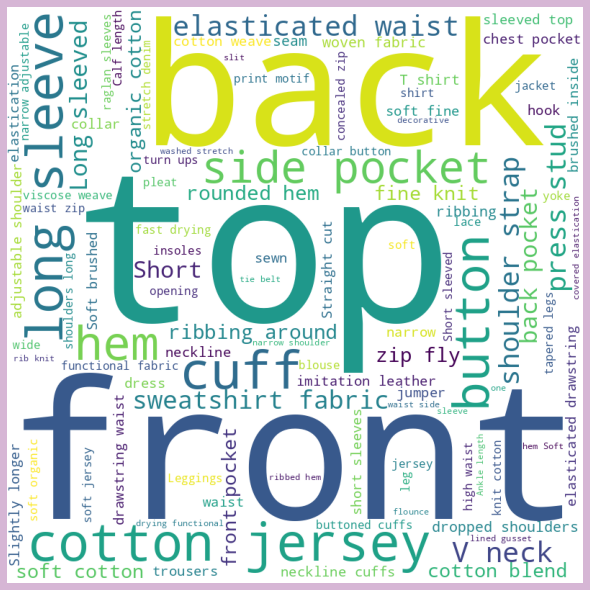

In [47]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords,).generate(' '.join(prod_desc)) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#d6b6d5') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Mean Price for Articles</p>

In [48]:
articles_for_merge = articles[['article_id', 'product_group_name']]

In [49]:
articles_for_merge = transactions[['article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

In [50]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'], format='%Y/%m/%d')

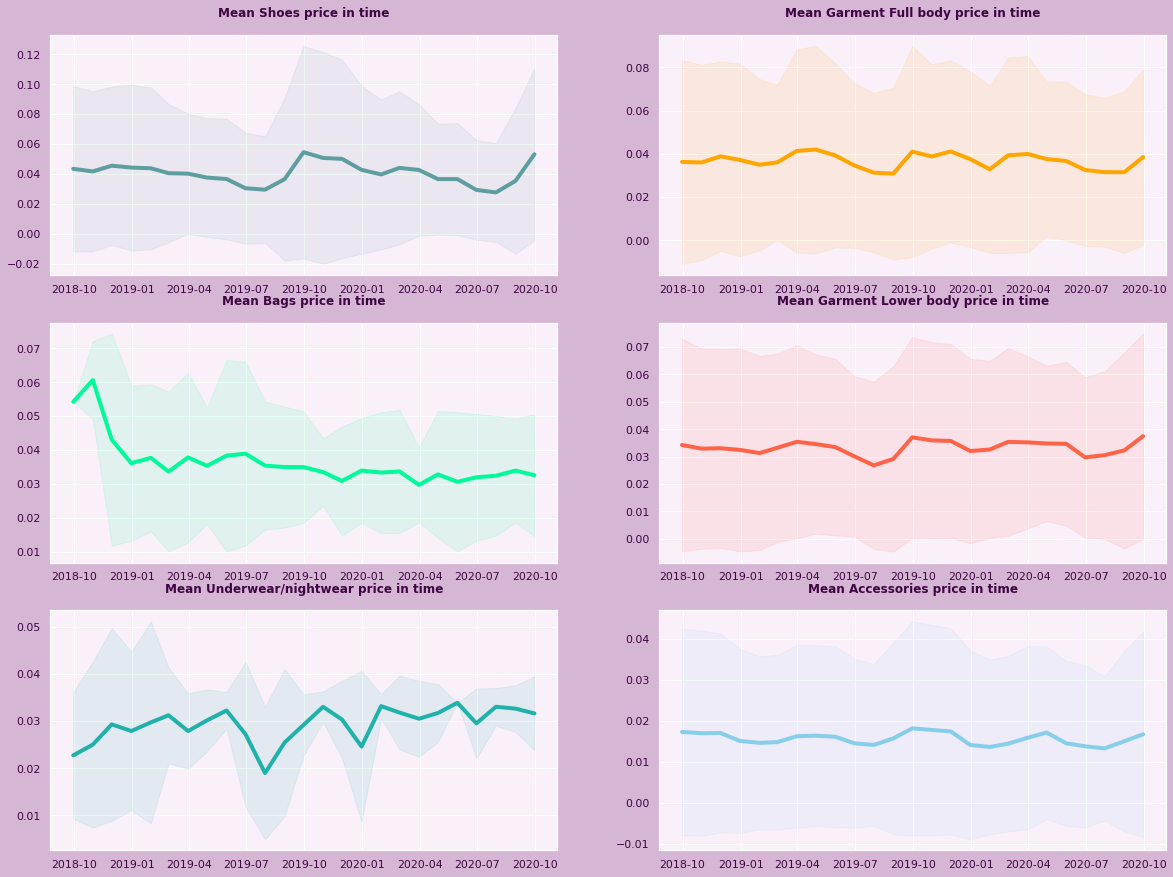

In [51]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear','Accessories']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen','skyblue']
k = 0
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(3, 2, figsize=(20, 15),facecolor = '#d6b6d5')

for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time',fontsize=12, pad=18, color=font_color, **csfont,fontweight = 'bold')
            ax[i, j].tick_params(axis='x', colors=font_color)
            ax[i, j].tick_params(axis='y', colors=font_color)
           
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()


# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Top 5 Articles with maximum price</p>

In [52]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]

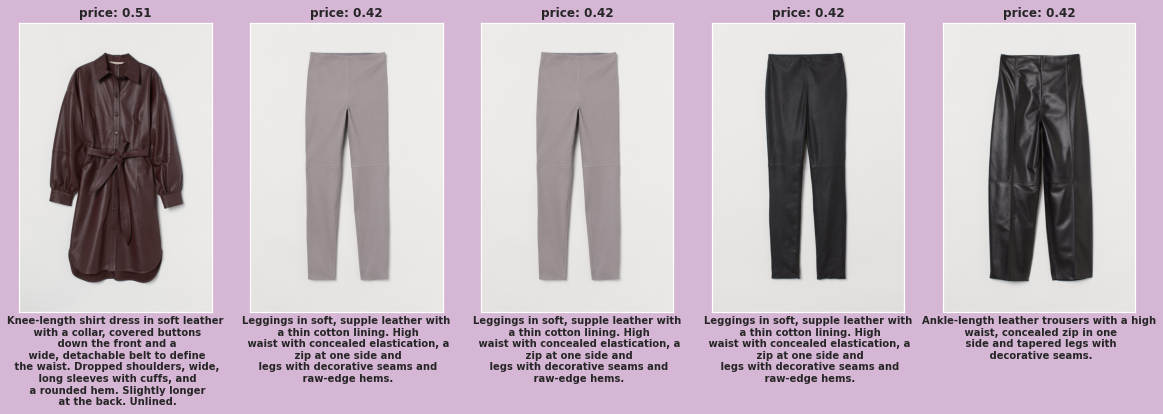

In [53]:
f, ax = plt.subplots(1, 5, figsize=(20,10),facecolor = '#d6b6d5')
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}',fontweight = 'bold')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10,fontweight = 'bold')
    i += 1
plt.show()

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#3e0542;">Top 5 Articles with minimum price</p>

In [54]:
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

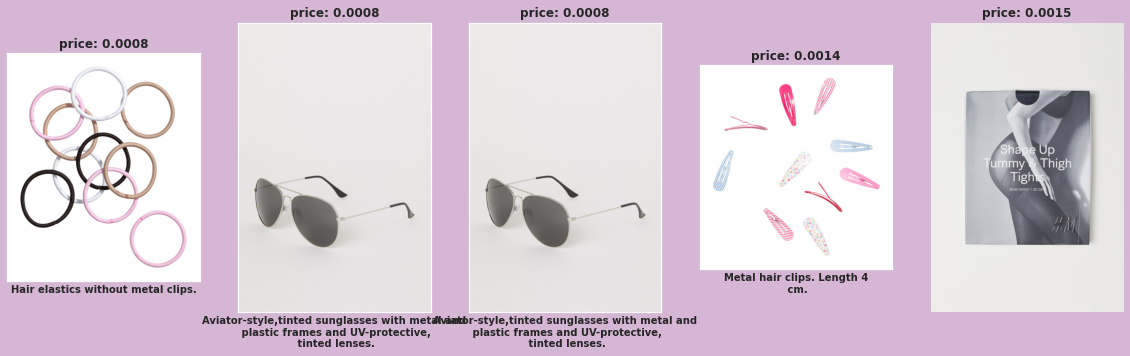

In [55]:
f, ax = plt.subplots(1, 5, figsize=(20,10),facecolor = '#d6b6d5')
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}',fontweight = 'bold')
    ax[i].set_xlabel(desc, fontsize=10,fontweight = 'bold')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()

# <p style="background-color:#d6b6d5;font-family:newtimeroman;color:#3e0542;font-size:90%;text-align:center;">Please check out my notebook on H and M Fashion Recommendation.Click on the link below</p>

# https://www.kaggle.com/code/nadianizam/h-m-fashion-recommendation-with-pyspark